In [2]:
import numpy as np 
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
allData = pd.read_csv("journal.pone.0185912.s003.csv")
allData.head(10)

,Source,Site_source,Target,Site_target,Transfers,Year,Week
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6
9,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,8


In [4]:
allData['FullSourceName'] = allData.Source + allData.Site_source
allData['FullTargetName'] = allData.Target + allData.Site_target
allData['Transfer'] = allData.FullSourceName +'='+ allData.FullTargetName
allData['WeekFromStart'] = (allData.Year-2014)*52 + allData.Week - 48



allData.head(20)
np.unique(allData.WeekFromStart.values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [5]:
allData['TimePeriod'] = (allData.WeekFromStart / 4).astype(int)
allData.head(20)

,Source,Site_source,Target,Site_target,Transfers,Year,Week,FullSourceName,FullTargetName,Transfer,WeekFromStart,TimePeriod
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,0,0
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,0
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,0
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,5,1
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,6,1
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,7,1
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,9,2
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,10,2
9,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,8,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,12,3


In [6]:
reducedData = allData[['Transfer','Transfers','TimePeriod']]
reducedData.head(10)

,Transfer,Transfers,TimePeriod
0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,0
1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0
2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0
3,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,0
4,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,1
5,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,1
6,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,1
7,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,2
8,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,2
9,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,3


In [7]:
group = reducedData.groupby(['Transfer', 'TimePeriod'], as_index=False).sum()
group.head()

,Transfer,TimePeriod,Transfers
0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,0,8
1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,5
2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,5
3,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,10
4,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,4,11


In [8]:
ACU2CUtransfers = group[group['Transfer']=='AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH'].Transfers.values
ACU2CUtimePeriod = group[group['Transfer']=='AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH'].TimePeriod.values

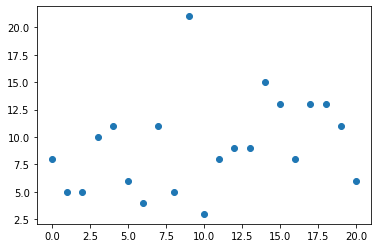

In [9]:
plt.scatter(ACU2CUtimePeriod,ACU2CUtransfers)
plt.show()

In [16]:
PRUHWards = np.unique(allData[allData['Site_target'] == 'PRUH'].FullTargetName.values)
PRUHWards.shape

(29,)

In [17]:
np.unique(allData[allData['Site_target'] == 'DH'].FullTargetName.values).shape


(46,)

In [18]:
np.unique(allData[allData['Site_target'] == 'Orpington'].FullTargetName.values).shape

(5,)

Week
0     1304
1     2379
2     2223
3     2305
4     2347
5     2355
6     2239
7     2216
8     2389
9     2308
10    2452
11    2359
12    2336
13    2183
14    2137
15    2067
16    2214
17    2266
18    2208
19    2359
20    2445
21    2264
22    2360
23    2608
24    2491
25    2644
26    2745
27    2556
28    2615
29    2410
30    2402
31    2481
32    2466
33    2475
34    2568
35    2537
36    2442
37    2463
38    2528
39    2374
40    2371
41    2343
42    2410
43    2431
44    2547
45    2514
46    2451
47    2453
48    2415
49    2383
50    2491
51    2238
52    1367
Name: Transfers, dtype: int64
range(0, 51) (51,)


'\nx = range(0,13,1)\nplt.scatter(x,groupedTransfers)\n'

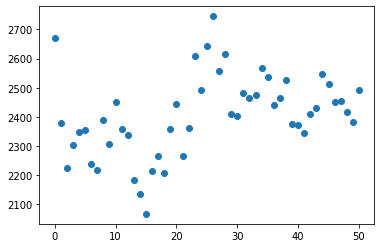

In [57]:
#total transfers throughout 2015

totalTransfers = allData[allData['Year'] == 2015].groupby(['Week']).sum()['Transfers']

#check if 2015 has both week 0 and 52
print(totalTransfers)
totalTransfers[0] = totalTransfers[0] + totalTransfers[52]

totalTransfers.drop(totalTransfers.index[52])

groupedTransfers = totalTransfers[0:51].groupby(totalTransfers[0:51].index // 4).sum()



x = range(0,51,1)
print(x, totalTransfers[0:51].shape)

plt.scatter(x, totalTransfers[0:51])
'''
x = range(0,13,1)
plt.scatter(x,groupedTransfers)
'''

In [58]:

np.unique(allData[allData['Year'] == 2015].Week.values, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 array([291, 384, 382, 398, 388, 391, 408, 398, 371, 397, 385, 401, 399,
        367, 356, 341, 343, 366, 367, 381, 393, 399, 371, 399, 366, 413,
        385, 389, 388, 378, 350, 367, 388, 365, 395, 389, 385, 389, 403,
        384, 387, 386, 389, 371, 374, 388, 385, 378, 363, 403, 374, 340,
        277]))

In [59]:
np.unique(allData[allData['Year'] == 2016].Week.values, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([210, 379, 383, 389, 408, 372, 392, 379, 386, 383, 410, 374, 367,
        367, 378, 366, 376, 356, 339, 364, 344, 361, 342, 337, 339, 306,
        186]))